# Análisis de resultados cuestionario a funcionarios
## Carga de datos y limpieza

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Después de montar Google Drive, puedes acceder a los archivos en tu unidad de la siguiente manera:

# Cargar el archivo CSV en un DataFrame
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Tavarandu/Evaluacion_plan.csv",  nrows=3)
data.head()

# Guardar el DataFrame en un archivo CSV
data.to_csv("/content/drive/My Drive/Colab Notebooks/Tavarandu/Eva_plan.csv", index=False)  # El argumento 'index=False' evita que se escriba el índice en el archivo CSV

Mounted at /content/drive


In [ ]:
# Cargamos los datos limpiados en R y guardados en un .csv

data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Tavarandu/eval_plan_full.csv")

In [ ]:
# Cargar el archivo CSV de funcionarios en un DataFrame
data_fun = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Tavarandu/Base_funcionarios.csv")

In [ ]:
# Unir las bases de datos 'average_per_px_avg' y 'data_f' utilizando 'CODIGO' como llave
data_unida = pd.merge(data_fun, data, on='CODIGO', how='inner')


In [ ]:
data_unida.to_csv("/content/drive/My Drive/Colab Notebooks/Tavarandu/Datos_MuniEval.csv", index=False)

## Análisis exploratorio de los datos


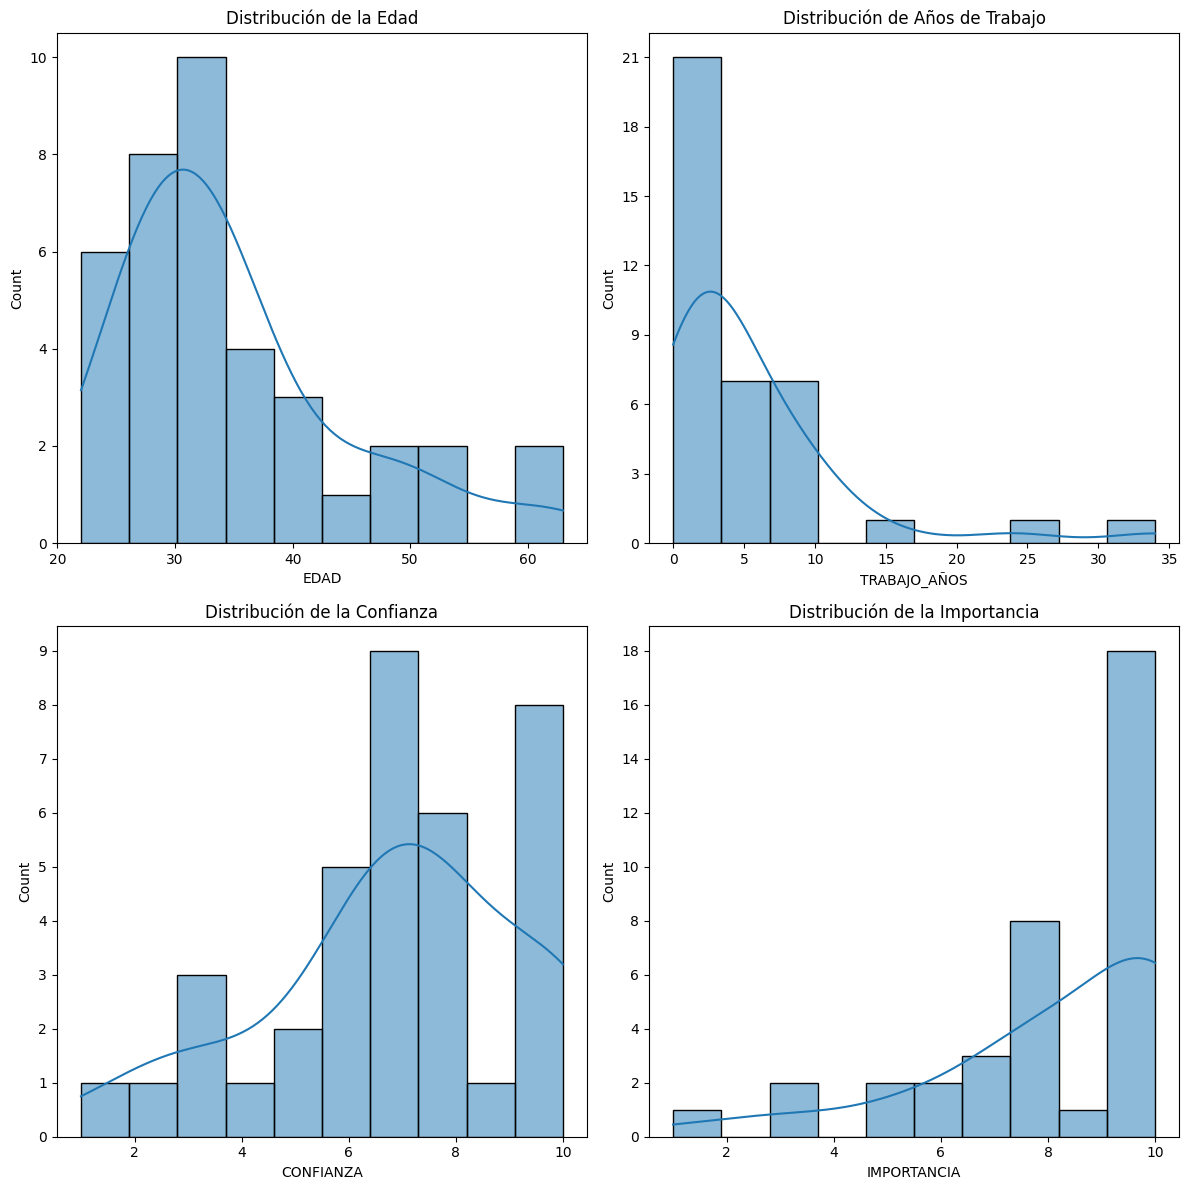

In [ ]:
# Creación de un conjunto de gráficos para las variables numéricas, excluyendo "RESPUESTAS"
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Gráfico de distribución para cada variable numérica (excluyendo "RESPUESTAS")
sns.histplot(data_unida['EDAD'], bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribución de la Edad')
axes[0, 0].yaxis.set_major_locator(plt.MaxNLocator(integer=True))

sns.histplot(data_unida['TRABAJO_AÑOS'], bins=10, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Años de Trabajo')
axes[0, 1].yaxis.set_major_locator(plt.MaxNLocator(integer=True))

sns.histplot(data_unida['CONFIANZA'], bins=10, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribución de la Confianza')
axes[1, 0].yaxis.set_major_locator(plt.MaxNLocator(integer=True))

sns.histplot(data_unida['IMPORTANCIA'], bins=10, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribución de la Importancia')
axes[1, 1].yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

## Revisión del balance de la muestra

In [ ]:
from scipy.stats import chi2_contingency, ttest_ind
import numpy as np

# Selección de variables para análisis
variables_continuas = ['EDAD', 'TRABAJO_AÑOS']
variables_categoricas = ['SEXO']

# Creando un DataFrame para almacenar los resultados de las pruebas
resultados_balance = pd.DataFrame(columns=['Variable', 'Test', 'Statistic', 'P-Value'])

# Realizando t-tests para variables continuas
for var in variables_continuas:
    grupo_tratamiento_var = data_unida[data_unida['CLASE'] == 'TRATAMIENTO'][var]
    grupo_control_var = data_unida[data_unida['CLASE'] == 'CONTROL'][var]
    t_stat, p_val = ttest_ind(grupo_tratamiento_var, grupo_control_var, nan_policy='omit')
    resultados_balance = resultados_balance.append({'Variable': var, 'Test': 'T-Test', 'Statistic': t_stat, 'P-Value': p_val}, ignore_index=True)

# Realizando pruebas chi-cuadrado para variables categóricas
for var in variables_categoricas:
    contingency_table = pd.crosstab(data_unida['CLASE'], data_unida[var])
    chi2, p_val, dof, expected = chi2_contingency(contingency_table)
    resultados_balance = resultados_balance.append({'Variable': var, 'Test': 'Chi-Square', 'Statistic': chi2, 'P-Value': p_val}, ignore_index=True)

resultados_balance

<ipython-input-55-9526758c05c7>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados_balance = resultados_balance.append({'Variable': var, 'Test': 'T-Test', 'Statistic': t_stat, 'P-Value': p_val}, ignore_index=True)
<ipython-input-55-9526758c05c7>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados_balance = resultados_balance.append({'Variable': var, 'Test': 'T-Test', 'Statistic': t_stat, 'P-Value': p_val}, ignore_index=True)
<ipython-input-55-9526758c05c7>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados_balance = resultados_balance.append({'Variable': var, 'Test': 'Chi-Square', 'Statistic': chi2, 'P-Value': p_val}, ignore_index=True)


,Variable,Test,Statistic,P-Value
0,EDAD,T-Test,-1.327606,0.192666
1,TRABAJO_AÑOS,T-Test,-0.015382,0.987812
2,SEXO,Chi-Square,1.406708,0.494923


## Análisis de las relaciones entre variables

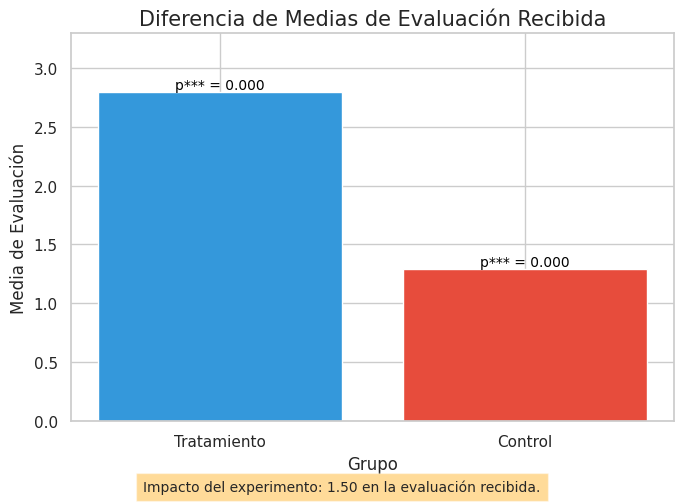

In [ ]:
from scipy.stats import ttest_ind


# Separar los datos en grupos de tratamiento y control
tratamiento_eval = data_unida[data_unida['CLASE'] == 'TRATAMIENTO']['evaluacion']
control_eval = data_unida[data_unida['CLASE'] == 'CONTROL']['evaluacion']

# Calcular las medias de cada grupo para "evaluacion"
media_eval_tratamiento = tratamiento_eval.mean()
media_eval_control = control_eval.mean()

# Realizar la prueba t para las diferencias de medias en "evaluacion"
t_stat_eval, p_val_eval = ttest_ind(tratamiento_eval.dropna(), control_eval.dropna())

# Configurando el estilo del gráfico
sns.set(style="whitegrid")
colors = ["#3498db", "#e74c3c"]

# Crear el gráfico de barras mejorado con la nota sobre el impacto del experimento

# Calculando la diferencia de medias entre los grupos
diferencia_medias = media_eval_tratamiento - media_eval_control
nota_impacto = f"Impacto del experimento: {diferencia_medias:.2f} en la evaluación recibida."

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(7, 5))

# Creando las barras
bars = ax.bar(['Tratamiento', 'Control'], [media_eval_tratamiento, media_eval_control], color=colors)

# Configurando título y etiquetas
ax.set_title('Diferencia de Medias de Evaluación Recibida', fontsize=15)
ax.set_ylabel('Media de Evaluación', fontsize=12)
ax.set_xlabel('Grupo', fontsize=12)

# Agregar texto del p-valor
ax.text(0, media_eval_tratamiento, f'p*** = {p_val_eval:.3f}', ha='center', va='bottom', fontsize=10, color='black')
ax.text(1, media_eval_control, f'p*** = {p_val_eval:.3f}', ha='center', va='bottom', fontsize=10, color='black')

# Agregar nota sobre el impacto del experimento
plt.figtext(0.5, 0.00000001, nota_impacto, ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.4, "pad":5})

# Ajustar límites y mostrar el gráfico
plt.ylim(0, max(media_eval_tratamiento, media_eval_control) + 0.5)
plt.tight_layout()
plt.show()



# Minería de texto de las respuestas cualitativas de los cinco pasos que funcionarios darian para diseñar un plan de trabajo que pueda ser implementado desde la Municipalidad.

In [ ]:
data_texto = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Tavarandu/texto_planes.csv")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


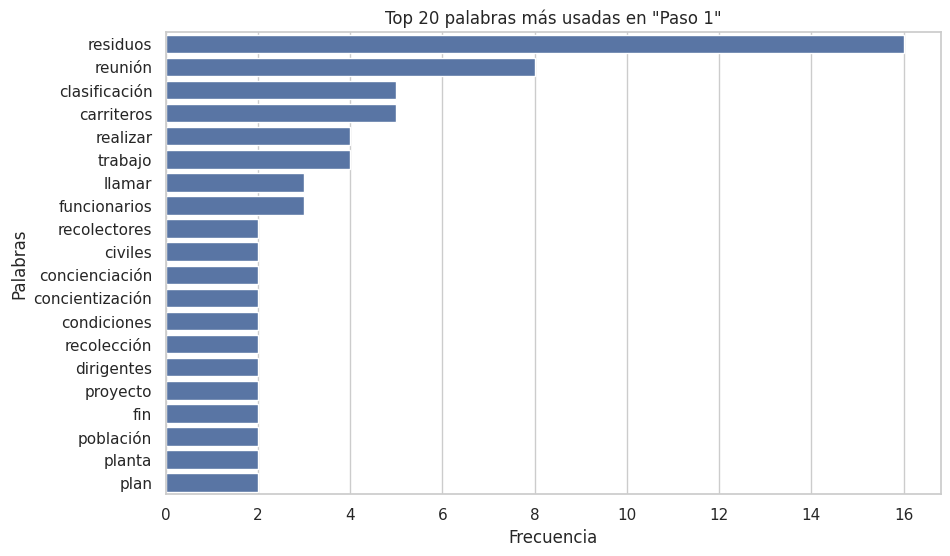

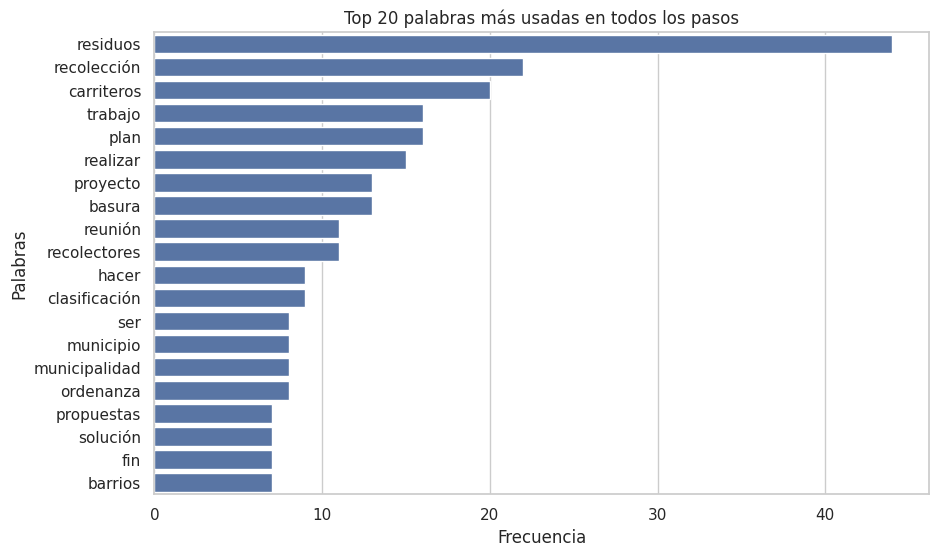

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

# Descargar las stop words en español
nltk.download('stopwords')

def explorar_palabras_mas_usadas(file_path):
    # Cargar los datos
    data = pd.read_csv(file_path)

    # Verificar si las columnas de texto contienen valores nulos y llenarlos con una cadena vacía
    columnas_texto = ['PASO 1', 'PASO 2', 'PASO 3', 'PASO 4', 'PASO 5']
    for col in columnas_texto:
        data[col] = data[col].fillna('')

    # Stop words en español
    spanish_stop_words = stopwords.words('spanish')

    # Explorar "Paso 1"
    vectorizer = CountVectorizer(stop_words=spanish_stop_words)
    paso1_counts = vectorizer.fit_transform(data['PASO 1'])
    paso1_words = pd.DataFrame(paso1_counts.toarray(), columns=vectorizer.get_feature_names_out())
    top_words_paso1 = paso1_words.sum().sort_values(ascending=False).head(20)

    # Explorar todos los pasos
    all_pasos = data[columnas_texto].apply(lambda x: ' '.join(x), axis=1)
    all_counts = vectorizer.fit_transform(all_pasos)
    all_words = pd.DataFrame(all_counts.toarray(), columns=vectorizer.get_feature_names_out())
    top_words_all = all_words.sum().sort_values(ascending=False).head(20)

    # Configurando el estilo del gráfico
    sns.set(style="whitegrid")

    # Gráfico para "Paso 1"
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_words_paso1.values, y=top_words_paso1.index)
    plt.title('Top 20 palabras más usadas en "Paso 1"')
    plt.xlabel('Frecuencia')
    plt.ylabel('Palabras')
    plt.show()

    # Gráfico para todos los pasos
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_words_all.values, y=top_words_all.index)
    plt.title('Top 20 palabras más usadas en todos los pasos')
    plt.xlabel('Frecuencia')
    plt.ylabel('Palabras')
    plt.show()

# Llamar a la función con la ruta del archivo
explorar_palabras_mas_usadas("/content/drive/My Drive/Colab Notebooks/Tavarandu/texto_planes.csv")

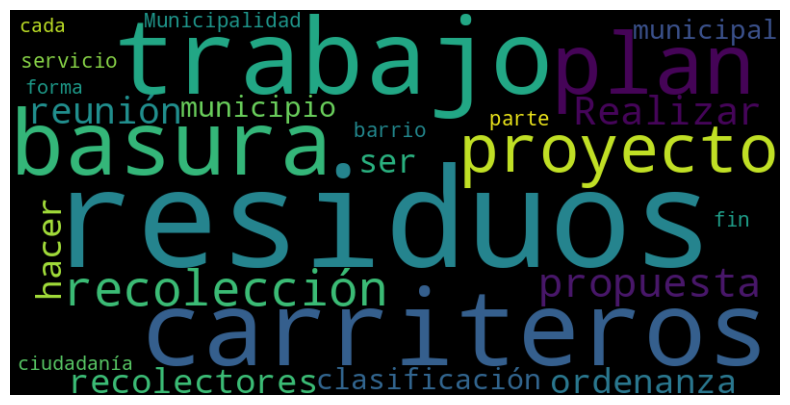

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords

def crear_nube_de_palabras(file_path):
    # Cargar los datos
    data = pd.read_csv(file_path)

    # Combinar todo el texto de los pasos
    texto_total = ' '.join(data[['PASO 1', 'PASO 2', 'PASO 3', 'PASO 4', 'PASO 5']].fillna('').sum())

    # Stop words en español
    spanish_stop_words = stopwords.words('spanish')

    # Crear una nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='black',
                          stopwords=spanish_stop_words, min_font_size=10,
                          max_words=25).generate(texto_total)

    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Llamar a la función con la ruta del archivo
crear_nube_de_palabras("/content/drive/My Drive/Colab Notebooks/Tavarandu/texto_planes.csv")

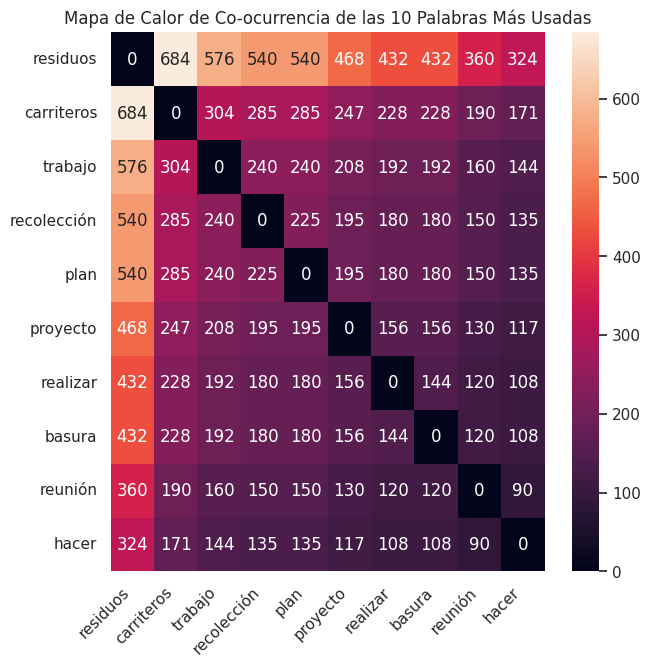

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import pandas as pd
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import numpy as np

def analisis_coocurrencia(file_path):
    data = pd.read_csv(file_path)
    text = ' '.join(data[['PASO 1', 'PASO 2', 'PASO 3', 'PASO 4', 'PASO 5']].fillna('').sum())

    # Stop words en español
    spanish_stop_words = stopwords.words('spanish')

    # Conteo de palabras
    vectorizer = CountVectorizer(stop_words=spanish_stop_words)
    X = vectorizer.fit_transform([text])  # Paso 2
    words = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

    # Seleccionar las 10 palabras más comunes
    top_words = words.sum().sort_values(ascending=False).head(10).index

    # Reconstruir la matriz de co-ocurrencia usando solo las 10 palabras más comunes
    filtered_vectorizer = CountVectorizer(vocabulary=top_words)
    filtered_X = filtered_vectorizer.fit_transform([text])  # Paso 3
    filtered_Xc = (filtered_X.T * filtered_X).toarray()
    np.fill_diagonal(filtered_Xc, 0)

    df = pd.DataFrame(filtered_Xc, index=top_words, columns=top_words)  # Paso 4

    # Visualizar con un mapa de calor
    plt.figure(figsize=(7, 7))
    ax = sns.heatmap(df, annot=True, fmt="d")
    plt.title("Mapa de Calor de Co-ocurrencia de las 10 Palabras Más Usadas")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right')
    plt.show()

analisis_coocurrencia("/content/drive/My Drive/Colab Notebooks/Tavarandu/texto_planes.csv")

# Análisis de texto ahora condicionado por tratamiento o control


In [ ]:
import pandas as pd

data_planes = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Tavarandu/texto_planes.csv")


# Función para transformar los valores de la columna CODIGO
def transformar_codigo(codigo):
    return 'P' + codigo.split(' ')[1]

# Aplicar la función solo a la columna CODIGO
data_planes['CODIGO'] = data_planes['CODIGO'].apply(transformar_codigo)

In [ ]:
# Seleccionar solo las columnas relevantes de data_planes
columnas_planes = ['CODIGO', 'PASO 1', 'PASO 2', 'PASO 3', 'PASO 4', 'PASO 5']
data_planes_reducido = data_planes[columnas_planes]

# Unir data_unida y data_planes_reducido
data_combinada = pd.merge(data_unida, data_planes_reducido, on='CODIGO', how='left')

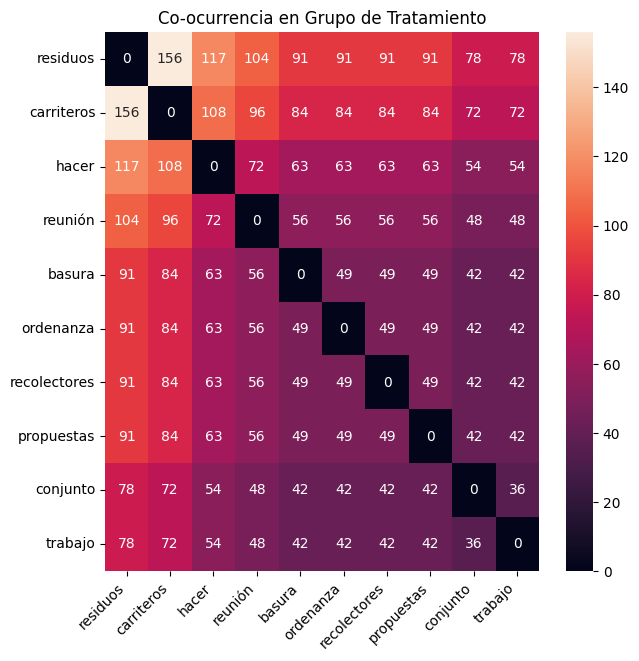

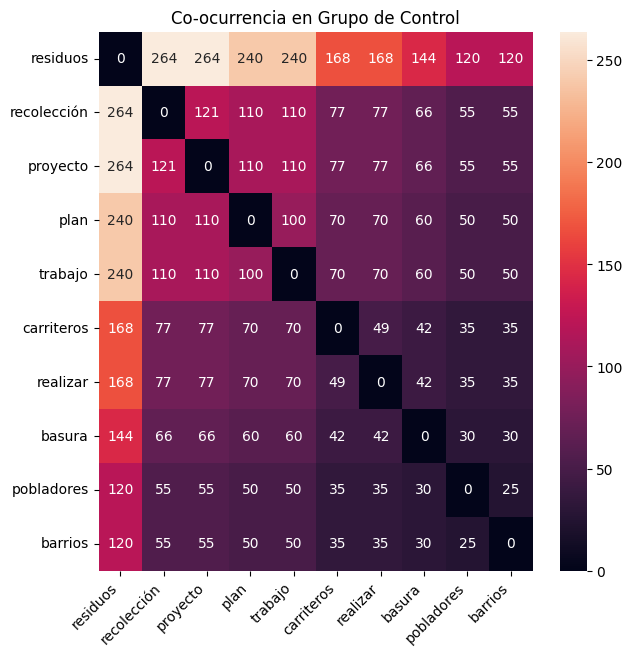

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import pandas as pd
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import numpy as np

def analisis_coocurrencia(data):


    # Convertir cada columna a string
    for col in ['PASO 1', 'PASO 2', 'PASO 3', 'PASO 4', 'PASO 5']:
        data[col] = data[col].astype(str)

    # Separar los datos en grupos de tratamiento y control
    data_tratamiento = data[data['CLASE'] == 'TRATAMIENTO']
    data_control = data[data['CLASE'] == 'CONTROL']

    # Stop words en español
    spanish_stop_words = stopwords.words('spanish')

    # Función para calcular y visualizar la matriz de co-ocurrencia
    def calcular_y_visualizar_coocurrencia(data_subset, title):
        text = ' '.join(data_subset[['PASO 1', 'PASO 2', 'PASO 3', 'PASO 4', 'PASO 5']].fillna('').sum())

        # Conteo de palabras
        vectorizer = CountVectorizer(stop_words=spanish_stop_words)
        X = vectorizer.fit_transform([text])
        words = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

        # Seleccionar las 10 palabras más comunes
        top_words = words.sum().sort_values(ascending=False).head(10).index

        # Reconstruir la matriz de co-ocurrencia
        filtered_vectorizer = CountVectorizer(vocabulary=top_words)
        filtered_X = filtered_vectorizer.fit_transform([text])
        filtered_Xc = (filtered_X.T * filtered_X).toarray()
        np.fill_diagonal(filtered_Xc, 0)

        df = pd.DataFrame(filtered_Xc, index=top_words, columns=top_words)

        # Visualizar con un mapa de calor
        plt.figure(figsize=(7, 7))
        ax = sns.heatmap(df, annot=True, fmt="d")
        plt.title(title)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right')
        plt.show()

    # Calcular y visualizar las matrices de co-ocurrencia para cada grupo
    calcular_y_visualizar_coocurrencia(data_tratamiento, "Co-ocurrencia en Grupo de Tratamiento")
    calcular_y_visualizar_coocurrencia(data_control, "Co-ocurrencia en Grupo de Control")

# Llamar a la función con la ruta del archivo
analisis_coocurrencia(data_combinada)

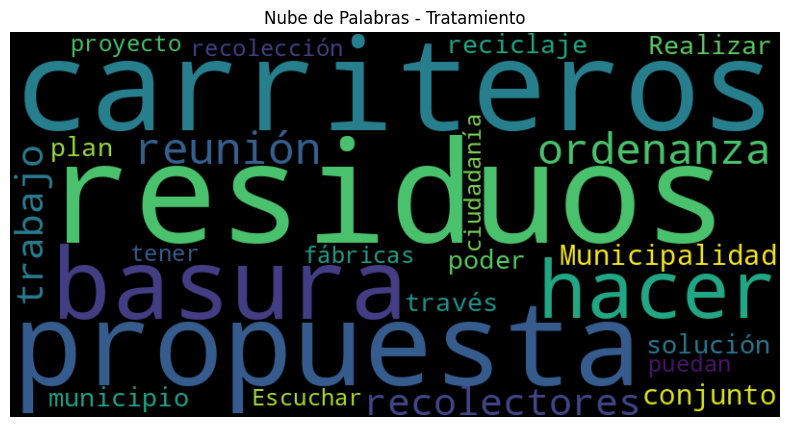

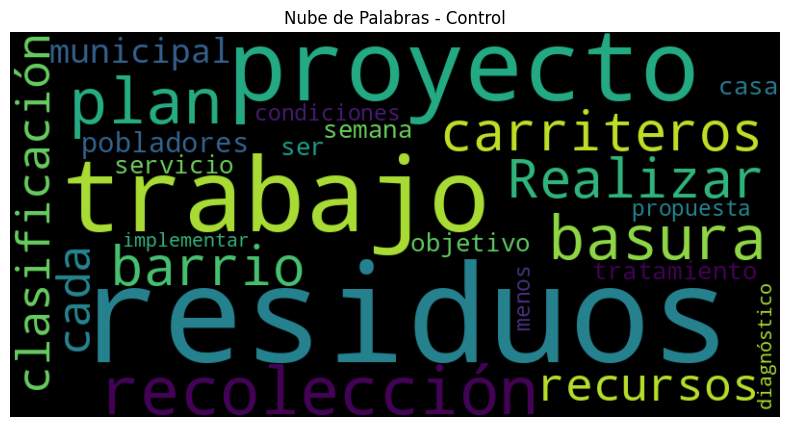

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords

def crear_nube_de_palabras(data):


    # Separar los datos en grupos de tratamiento y control
    data_tratamiento = data[data['CLASE'] == 'TRATAMIENTO']
    data_control = data[data['CLASE'] == 'CONTROL']

    # Stop words en español
    spanish_stop_words = stopwords.words('spanish')

    # Función para generar y mostrar la nube de palabras
    def generar_y_mostrar_nube(data_subset, title):
        texto_total = ' '.join(data_subset[['PASO 1', 'PASO 2', 'PASO 3', 'PASO 4', 'PASO 5']].fillna('').sum())

        # Crear una nube de palabras
        wordcloud = WordCloud(width=800, height=400, background_color='black',
                              stopwords=spanish_stop_words, min_font_size=10,
                              max_words=25).generate(texto_total)

        # Mostrar la nube de palabras
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(title)
        plt.axis('off')
        plt.show()

    # Generar y mostrar las nubes de palabras para cada grupo
    generar_y_mostrar_nube(data_tratamiento, "Nube de Palabras - Tratamiento")
    generar_y_mostrar_nube(data_control, "Nube de Palabras - Control")

# Llamar a la función con la ruta del archivo
crear_nube_de_palabras(data_combinada)